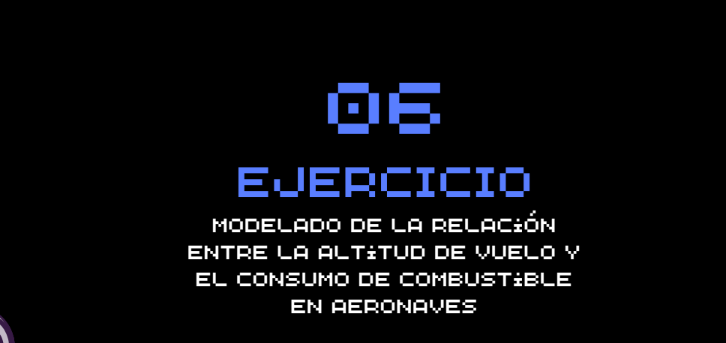
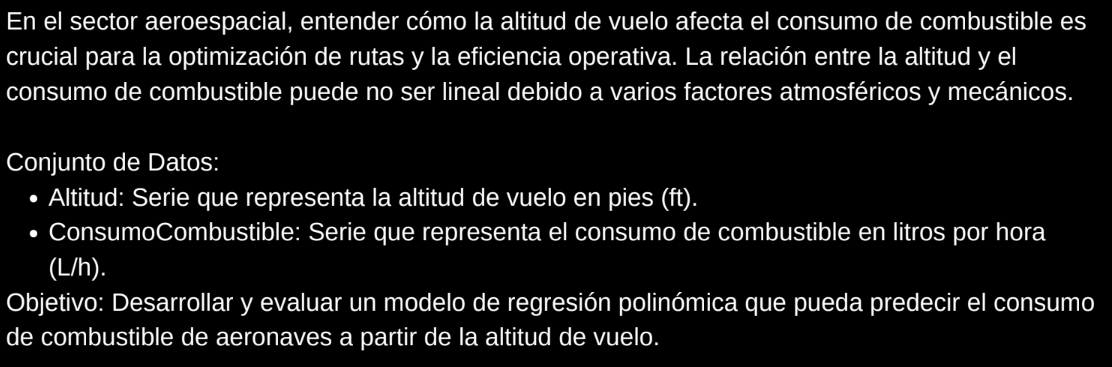
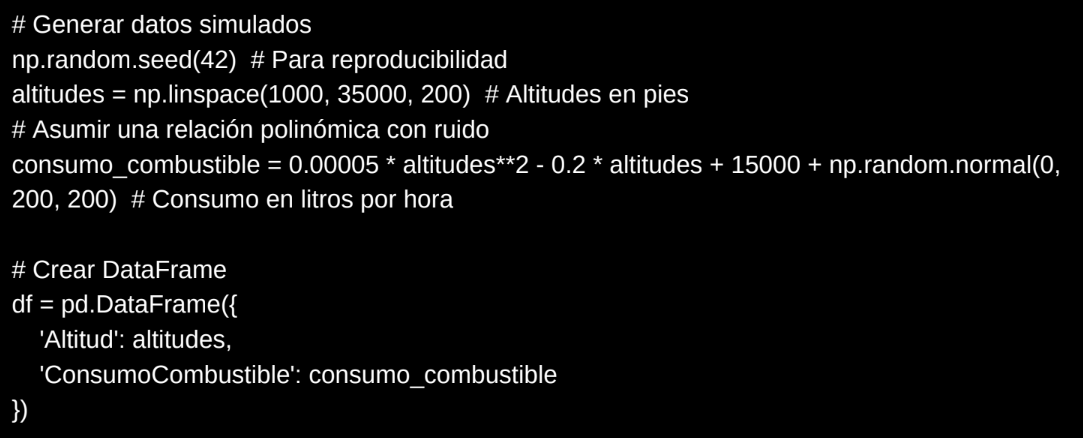

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos simulados
np.random.seed(42)  # Para reproducibilidad
altitudes = np.linspace(1000, 35000, 200)  # Altitudes en pies
# Asumir una relación polinómica con ruido
consumo_combustible = 0.00005 * altitudes**2 - 0.2 * altitudes + 15000 + np.random.normal(0, 200, 200)  # Consumo en litros por hora

# Crear DataFrame
df = pd.DataFrame({
    'Altitud': altitudes,
    'ConsumoCombustible': consumo_combustible
})


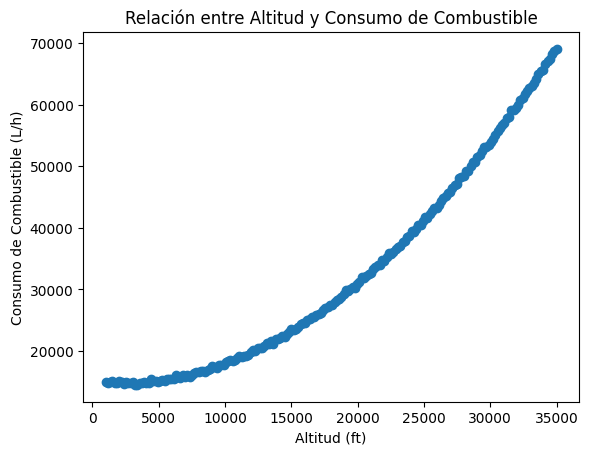

In [2]:
# Visualizar la relación entre Altitud y Consumo de Combustible
plt.scatter(df['Altitud'], df['ConsumoCombustible'])
plt.title('Relación entre Altitud y Consumo de Combustible')
plt.xlabel('Altitud (ft)')
plt.ylabel('Consumo de Combustible (L/h)')
plt.show()


In [3]:
# Análisis de correlación
print("Correlación entre variables:")
print(df.corr())


Correlación entre variables:
                     Altitud  ConsumoCombustible
Altitud             1.000000            0.964093
ConsumoCombustible  0.964093            1.000000


In [4]:
# Preparar los datos para el modelo de regresión polinómica
X = df['Altitud'].values.reshape(-1, 1)  # Cambiar la forma para sklearn 2D
y = df['ConsumoCombustible'].values


In [5]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Transformar las características para la regresión polinómica
poly = PolynomialFeatures(degree=2) #Regresion polinomica grado 2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [7]:
# Crear y entrenar el modelo de regresión polinómica
modelo = LinearRegression()
modelo.fit(X_train_poly, y_train)


LinearRegression()

In [8]:
# Predecir y evaluar el modelo
y_pred = modelo.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print("MSE (Error Cuadrático Medio):", mse)
print("R² (Coeficiente de Determinación):", r2)


Evaluación del Modelo:
MSE (Error Cuadrático Medio): 30992.39506528833
R² (Coeficiente de Determinación): 0.9998558363414992


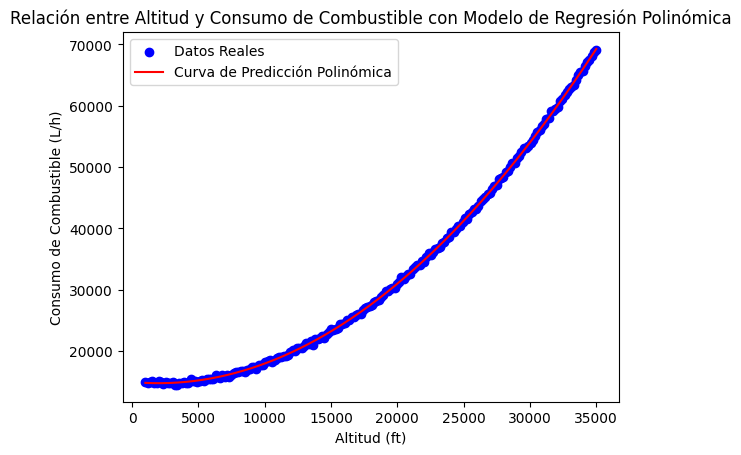

In [9]:
# Visualizar las predicciones del modelo y compararlas con los datos reales
plt.scatter(X, y, color='blue', label='Datos Reales')
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_range_pred = modelo.predict(poly.transform(X_range))
plt.plot(X_range, y_range_pred, color='red', label='Curva de Predicción Polinómica')
plt.title('Relación entre Altitud y Consumo de Combustible con Modelo de Regresión Polinómica')
plt.xlabel('Altitud (ft)')
plt.ylabel('Consumo de Combustible (L/h)')
plt.legend()
plt.show()


In [10]:
# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:")
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")



Coeficientes del modelo:
Intercepto: 14974.392347138662
Coeficientes: [ 0.00000000e+00 -1.99785724e-01  5.00216027e-05]
